<a href="https://colab.research.google.com/github/rajatdash/wip/blob/master/project_Frauddetection_ML_10Nov2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Common Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import stats 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = '/content/drive/My Drive/dataset_2.csv'
#path = "C://Users//rajat//Downloads//dataset_2.csv"

In [0]:
df = pd.read_csv(path)

In [5]:
df.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339'], dtype='object', length=394)

In [0]:
df.head(3)

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

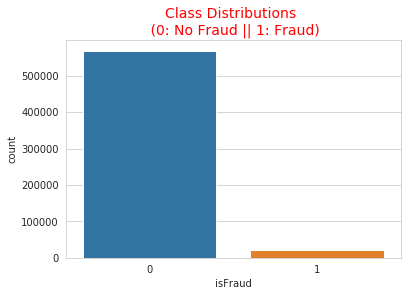

In [9]:
### target anlaysis
sns.set_style('whitegrid')
sns.countplot(df['isFraud'])
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14, color = 'red')

In [0]:
df['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [10]:
percentage_fraud = (20663/590540)*100
print(percentage_fraud)

3.4990009144173126


In [0]:
#basic datacheck
df.shape

(590540, 394)

In [0]:
#dimension reduction, duplicate removals, null value, PCA, correlation columns etc..
#missing values,outlier detection, normality check,distribution of data (skew, non-skew data), categorical data encoding
#features shoiuld be normally distributed (CLT - central limit theorem),
#minority class data detection, threshold, axioms - truth assumption, 5% at significance data
#target analysis - imbalance class (model bias can harm), Data Summary 
#bivariate anaysis - outlier detection, 

In [0]:
len(df.isnull().count())

394

In [0]:
categorical_features = df.select_dtypes(include=np.object).columns  # ?df.select_dtypes
numerical_featuress = df.drop(['isFraud'],axis=1).select_dtypes(include=np.number).columns

In [12]:
print(categorical_features)
print(numerical_featuress)

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'], dtype='object')
Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339'], dtype='object', length=379)


In [0]:
print("{}% of data belongs to class 1 ".format(len(df[df.isFraud == 1])/len(df)*100))
print("{}% of data belongs to class 0 ".format(len(df[df.isFraud == 0])/len(df)*100))

3.4990009144173126% of data belongs to class 1 
96.50099908558268% of data belongs to class 0 


In [0]:
df.isFraud == 1

In [0]:
df[numerical_featuress].shape

(590540, 379)

**Drop the columns with more than 70% missing value**

In [0]:
df_nm = df[numerical_featuress]

In [0]:
cols = df_nm.columns[df_nm.isnull().mean() > 0.7]

In [0]:
#removing the numerical data which has more than 70% data missing
df_nm_working = df_nm.drop(cols,axis=1)

In [16]:
df_nm_working.shape

(590540, 212)

The below shows that there are quite a large number of columns which are having 5% missing value, 108 columns. 107 columns have more than 99% data (1% missing value)

In [17]:
df_nm.drop(df_nm.columns[df_nm.isnull().mean() > 0.2],axis=1).shape

(590540, 177)

In [18]:
df_nm.drop(df_nm.columns[df_nm.isnull().mean() > 0.1],axis=1).shape

(590540, 108)

In [19]:
df_nm.drop(df_nm.columns[df_nm.isnull().mean() > 0.05],axis=1).shape

(590540, 108)

In [77]:
df_nm.drop(df_nm.columns[df_nm.isnull().mean() > 0.0001],axis=1).shape # mean nan in 590540 entries is 60, This value is 18 for the 6 missing entries in the entrire rowset

(590540, 50)

In [21]:
#histogram 
df_nm_working.head(2)

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,86400,68.5,13926,NaN,150.0,142.0,315.0,87.0,19.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,13.0,13.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# PLOT the variables


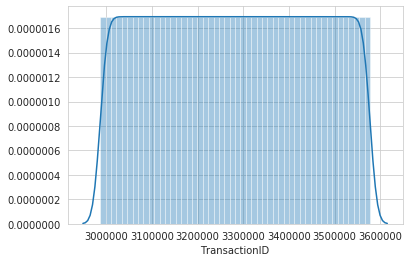

In [0]:
sns.set_style("whitegrid")
sns.distplot(df_nm[df_nm_working.columns[0]])

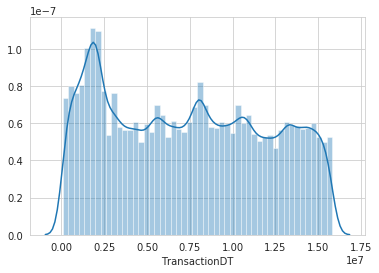

In [24]:
# no_figs = 5
# for i in range(no_figs):
#   sns.set_style("whitegrid")
#   sns.distplot(df_nm[df_nm_working.columns[i+1]])
sns.set_style("whitegrid")
sns.distplot(df_nm[df_nm_working.columns[1]])

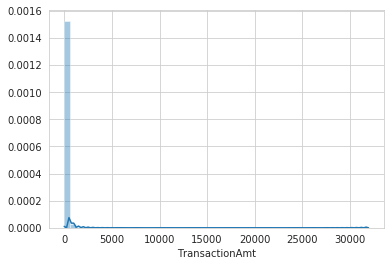

In [26]:
sns.set_style("whitegrid")
sns.distplot(df_nm[df_nm_working.columns[2]])

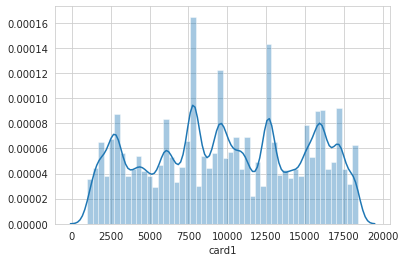

In [27]:
fig_no = 3
sns.set_style("whitegrid")
sns.distplot(df_nm[df_nm_working.columns[fig_no]])

The first row has NaN value, it is problematic while plotting the graph. We can replace them by putting 0 on the first row

In [45]:
df_nm_working.index

RangeIndex(start=0, stop=590540, step=1)

In [47]:
#df_nm_working.loc[df_nm_working.index[0],:]
df_nm_working.iloc[0,:].isna().sum()

22

In [0]:
#Replaced the NaN to 0
df_nm_working.iloc[0,:] = df_nm_working.iloc[0,:].replace(np.nan,0)

In [54]:
df_nm_working.iloc[0,:].isna().sum()

0

The 4th Column has lots of NaN, hence snsdistplot is not working, we need to either do a box plot or a histogram

In [60]:
df_nm_working.iloc[:,4].isna().sum()

8932

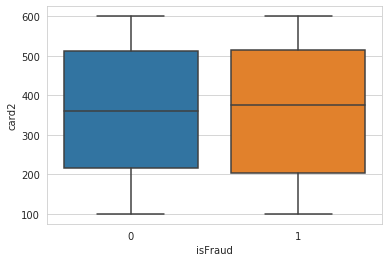

In [81]:
fig_no = 4
sns.set_style("whitegrid")
sns.boxplot(x=df.isFraud,y=df_nm[df_nm_working.columns[fig_no]])

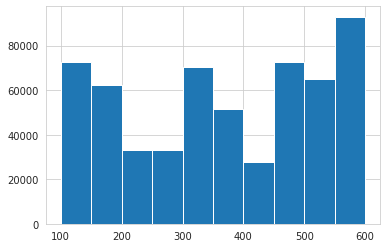

In [82]:
df_nm[df_nm_working.columns[4]].hist()

In [83]:
df_nm_working.iloc[:,5].isna().sum()

1565

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


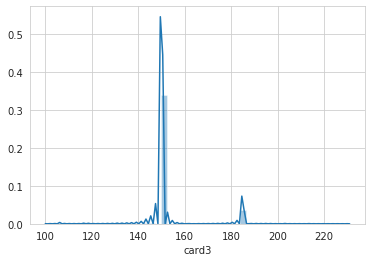

In [84]:
fig_no = 5
sns.set_style("whitegrid")
sns.distplot(df_nm[df_nm_working.columns[fig_no]])

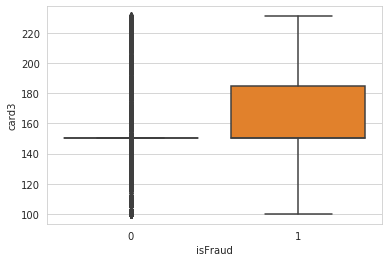

In [85]:
sns.set_style("whitegrid")
sns.boxplot(x=df.isFraud,y=df_nm[df_nm_working.columns[fig_no]])

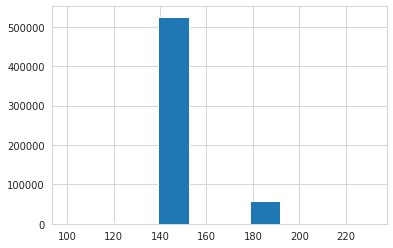

In [86]:
df_nm[df_nm_working.columns[5]].hist()

In [87]:
df_nm_working.iloc[:,6].isna().sum()

4259

ValueError: ignored

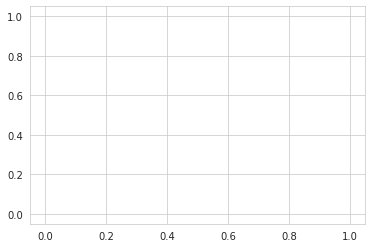

In [88]:
fig_no = 6
sns.set_style("whitegrid")
sns.distplot(df_nm[df_nm_working.columns[fig_no]])

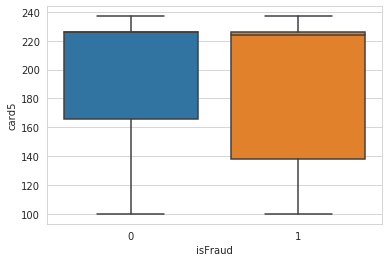

In [89]:
sns.set_style("whitegrid")
sns.boxplot(x=df.isFraud,y=df_nm[df_nm_working.columns[fig_no]])

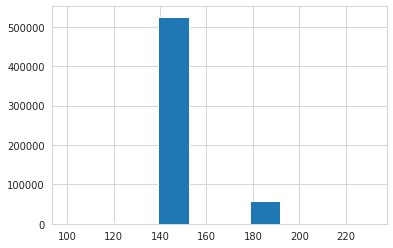

In [90]:
df_nm[df_nm_working.columns[5]].hist()

We need two figures for the loop, so for 5 figures we need to have 10 figures

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, se

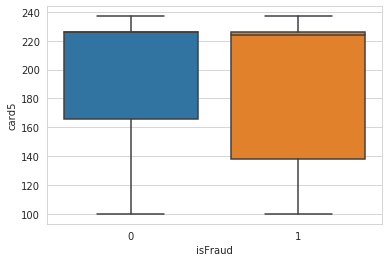

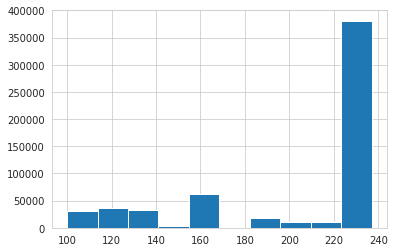

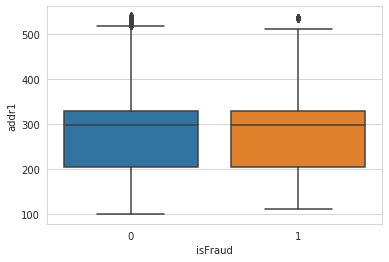

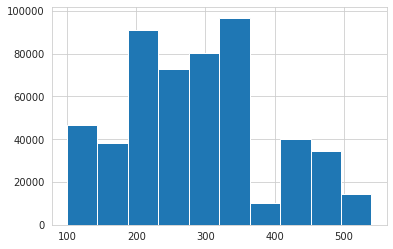

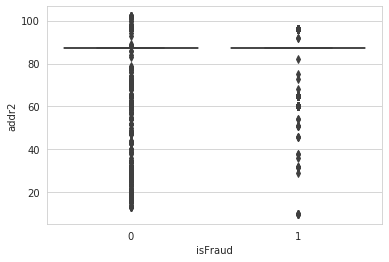

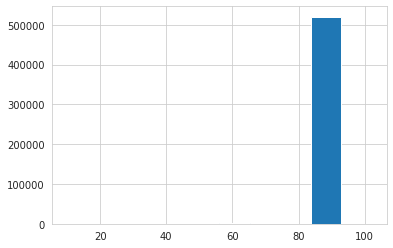

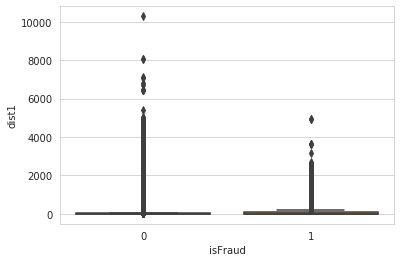

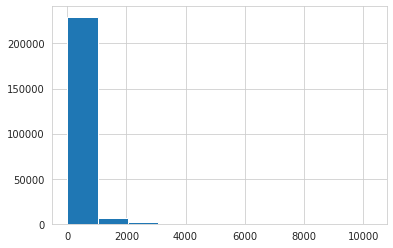

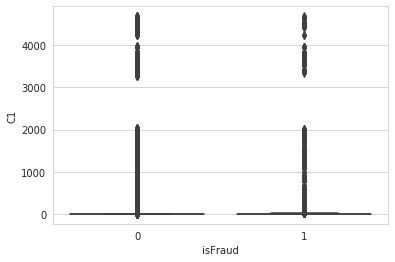

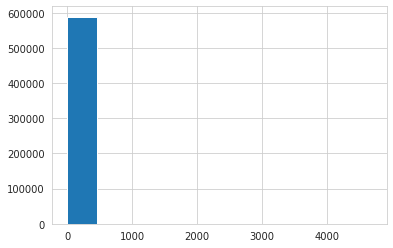

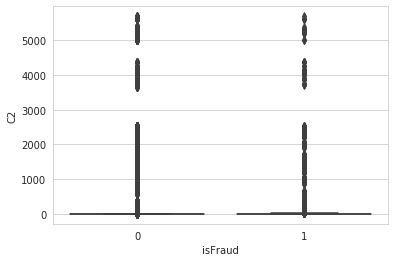

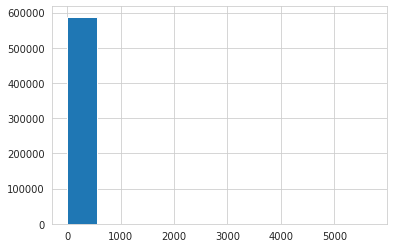

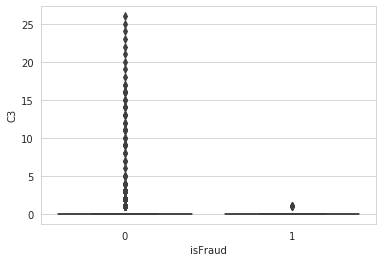

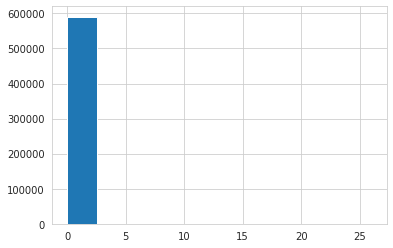

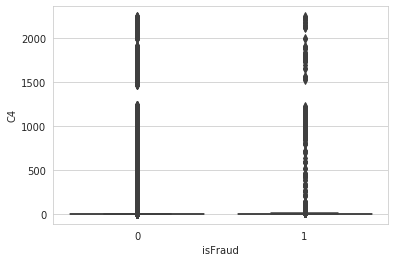

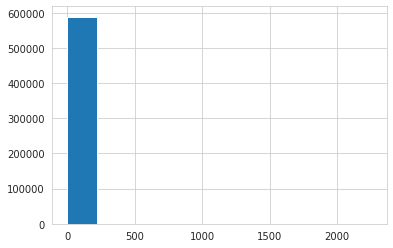

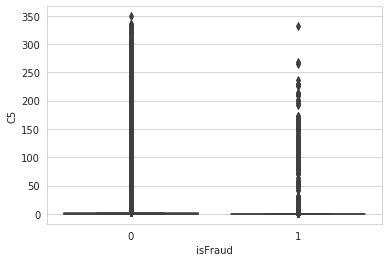

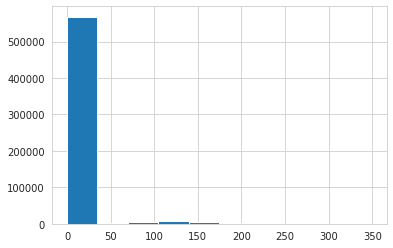

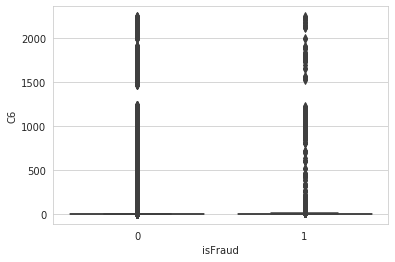

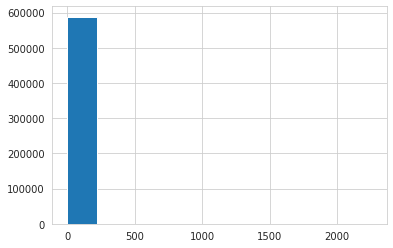

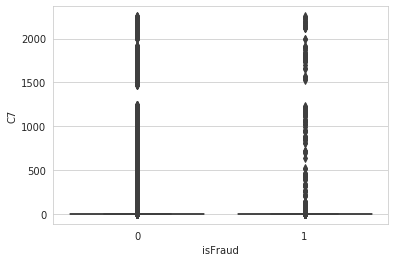

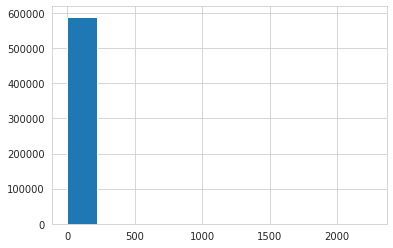

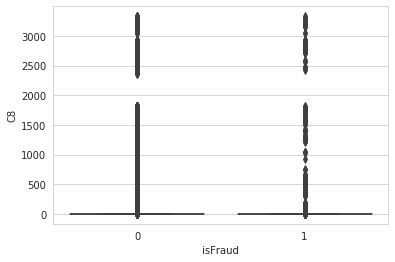

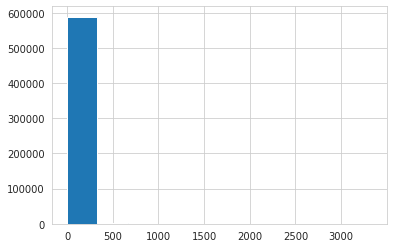

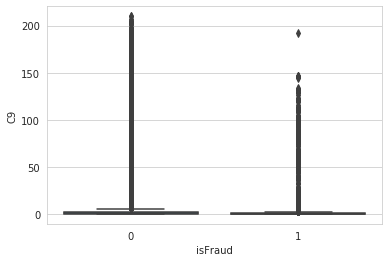

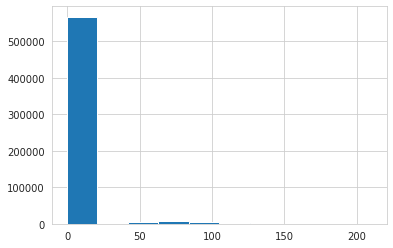

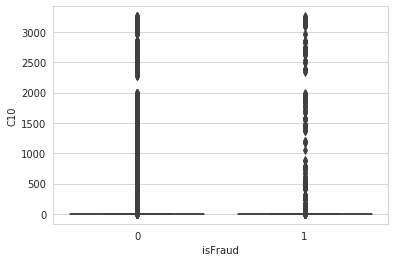

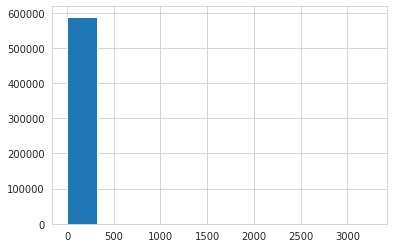

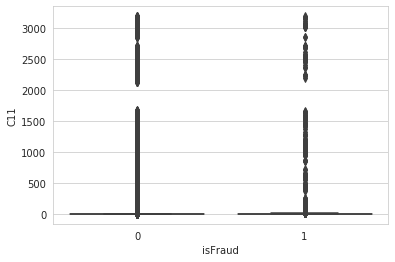

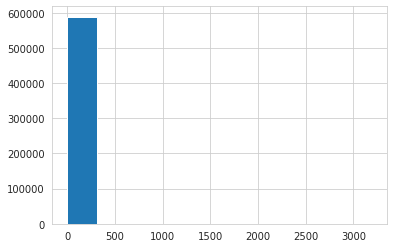

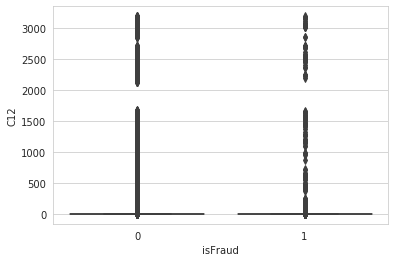

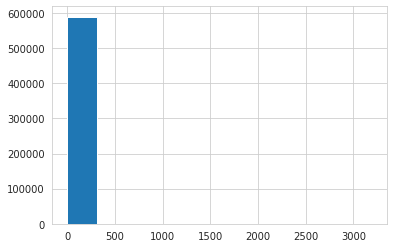

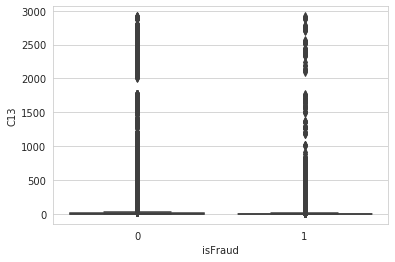

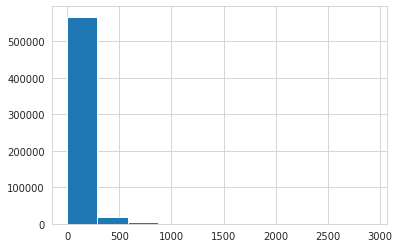

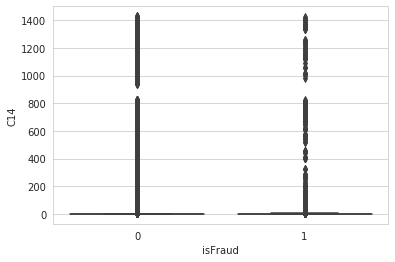

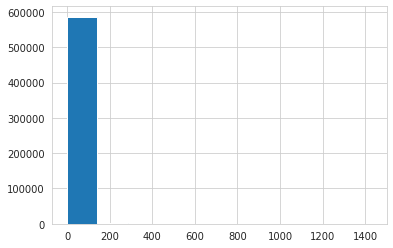

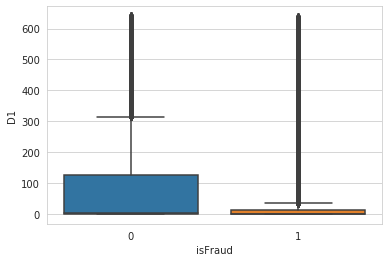

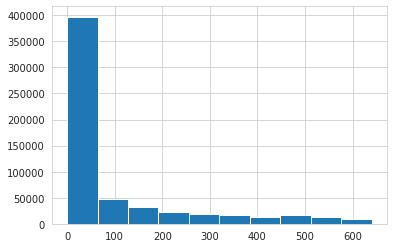

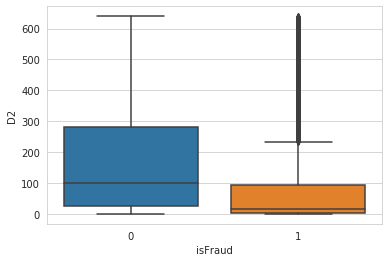

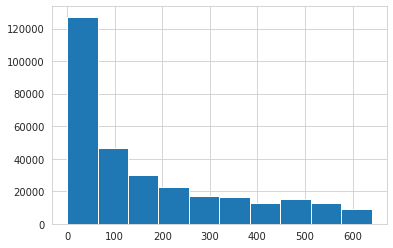

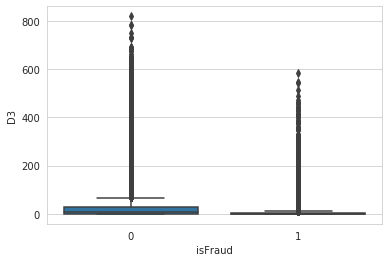

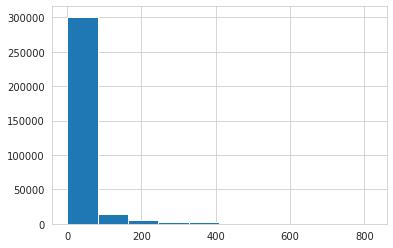

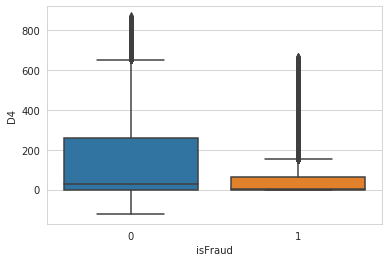

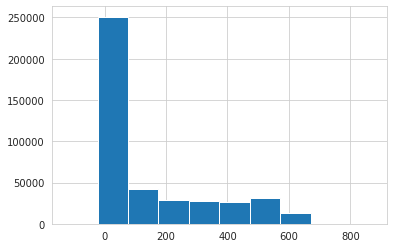

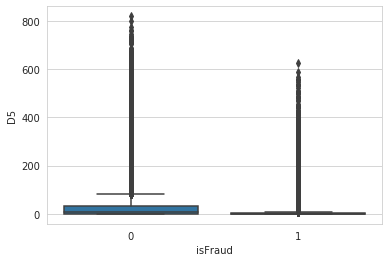

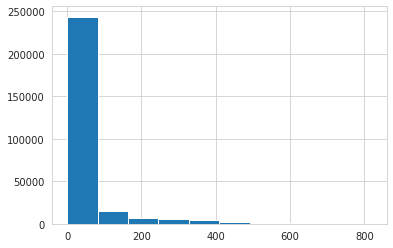

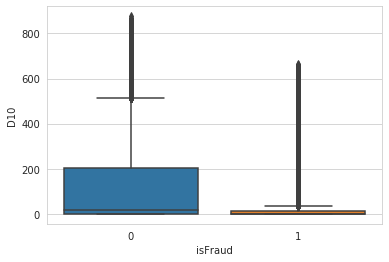

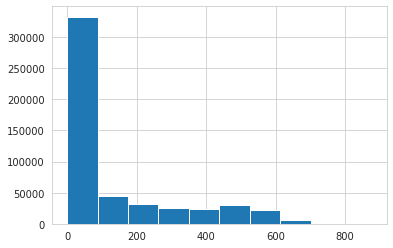

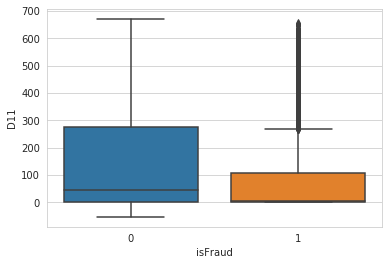

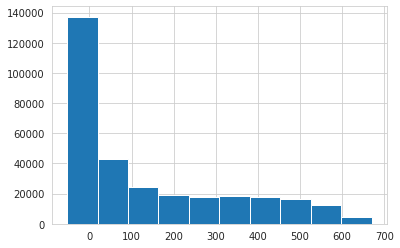

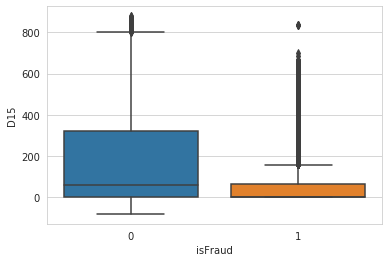

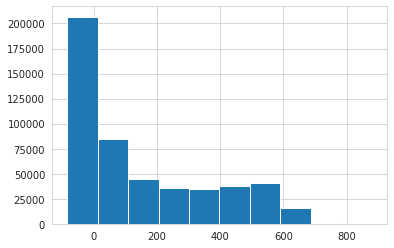

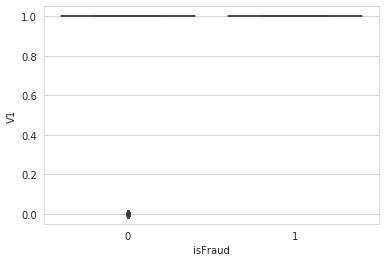

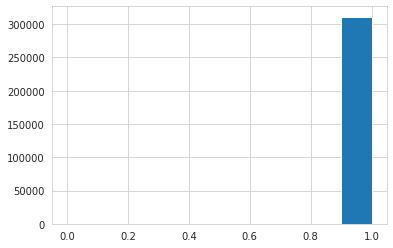

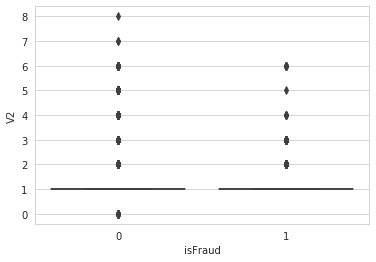

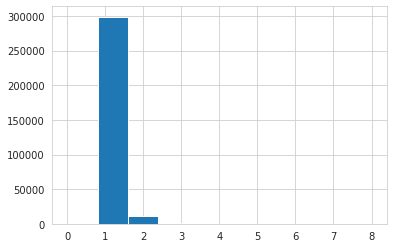

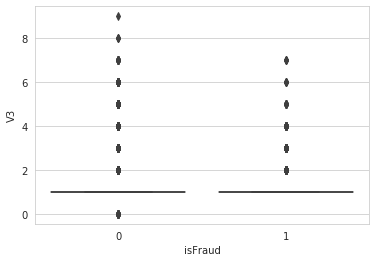

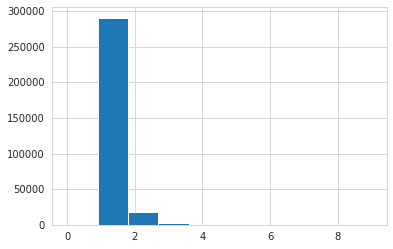

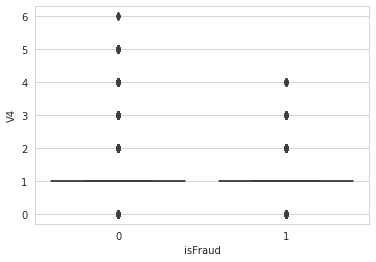

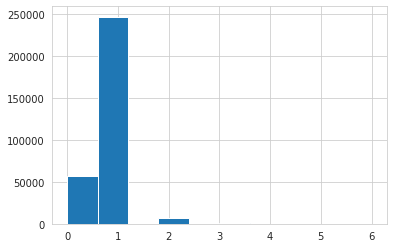

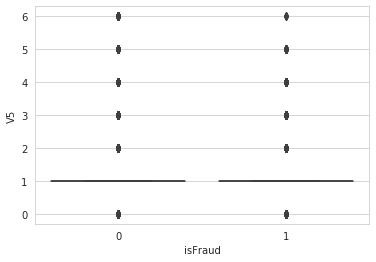

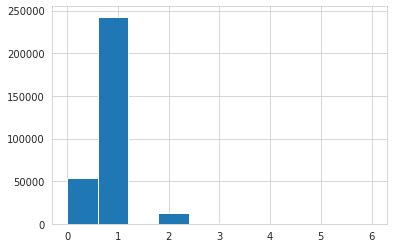

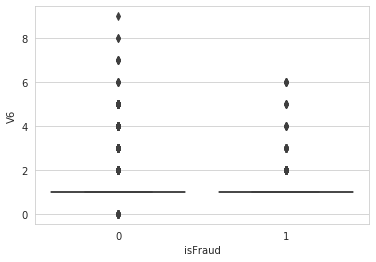

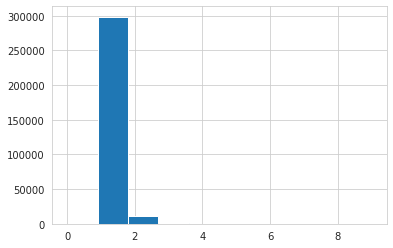

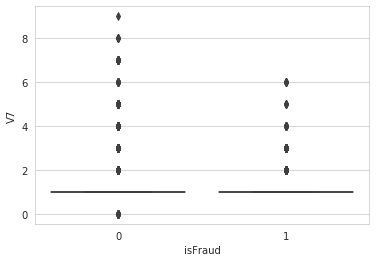

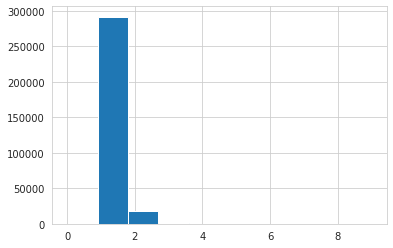

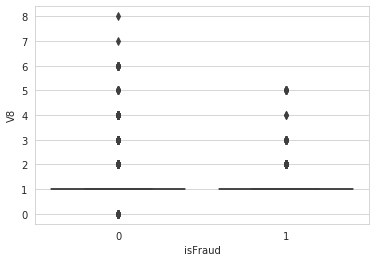

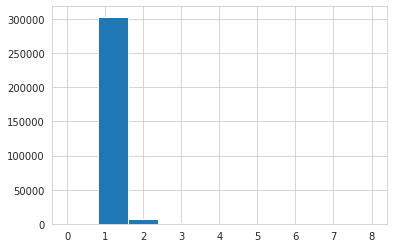

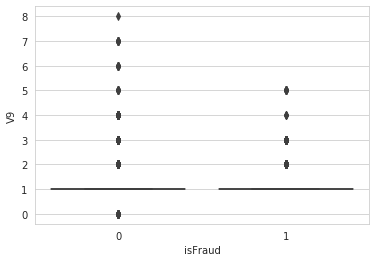

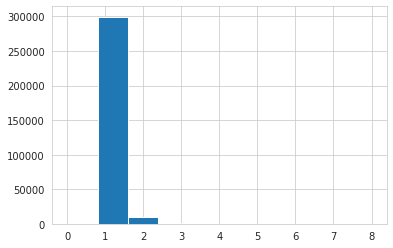

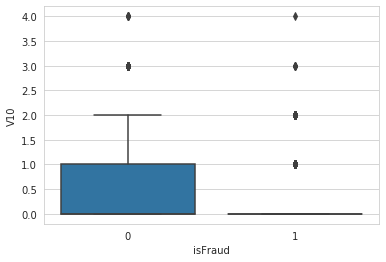

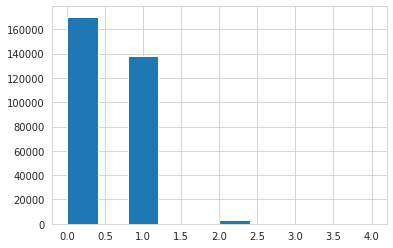

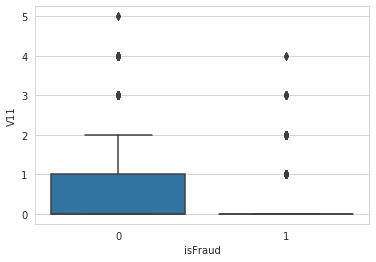

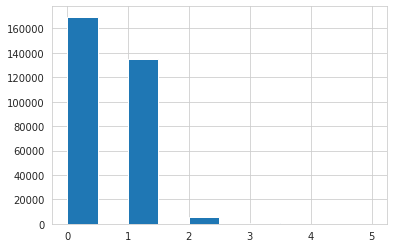

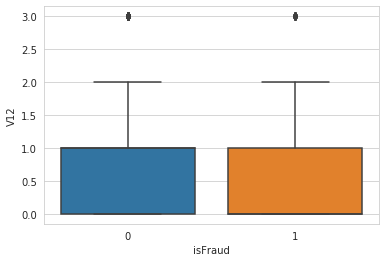

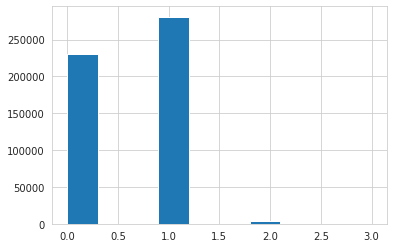

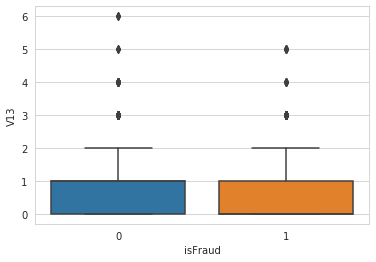

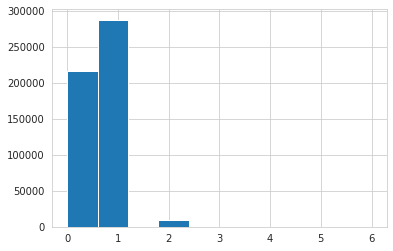

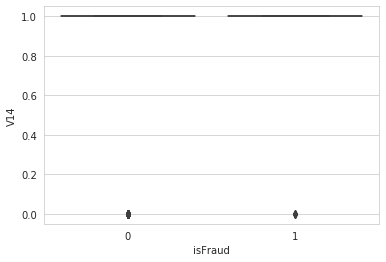

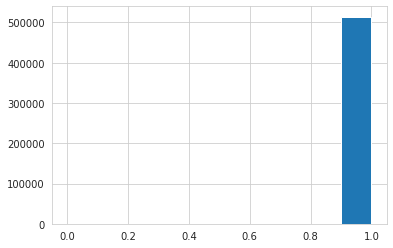

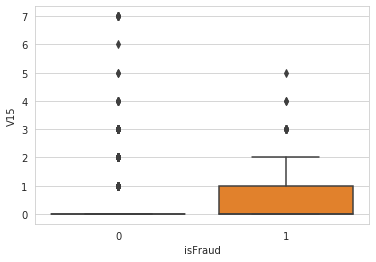

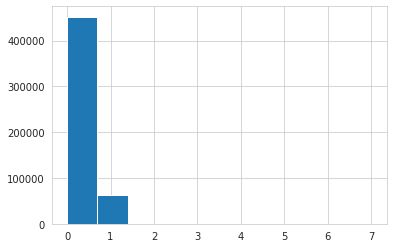

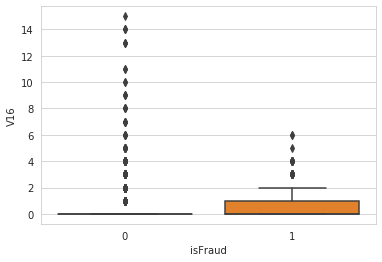

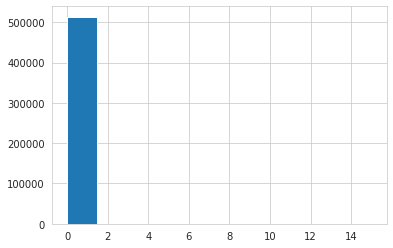

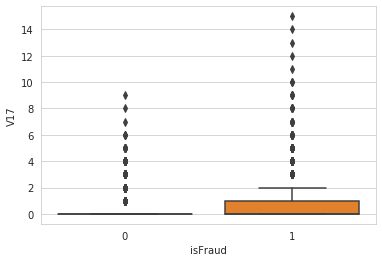

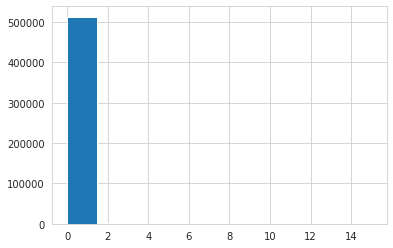

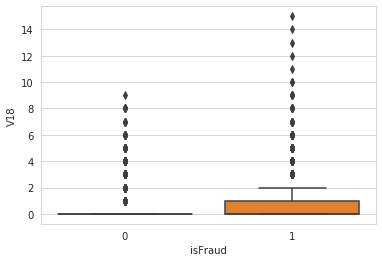

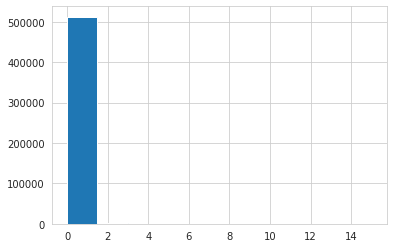

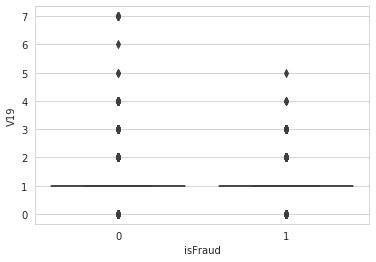

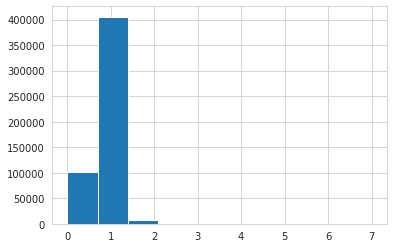

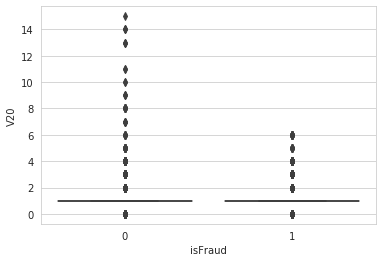

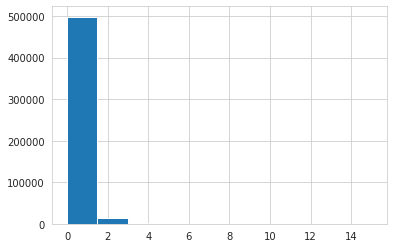

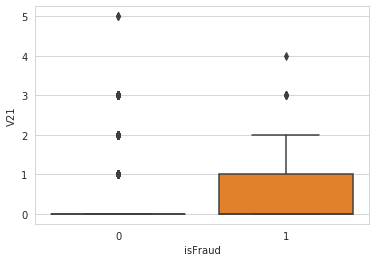

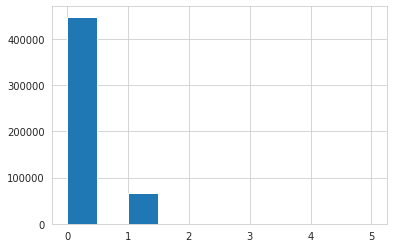

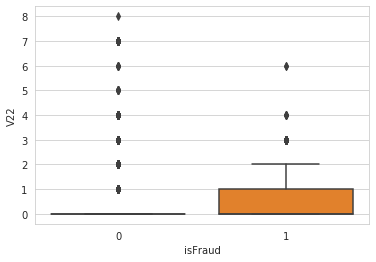

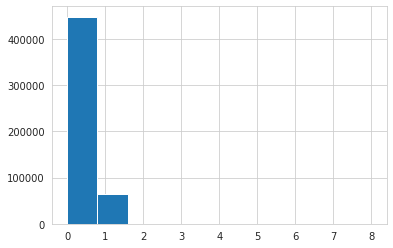

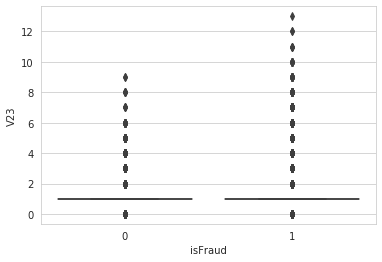

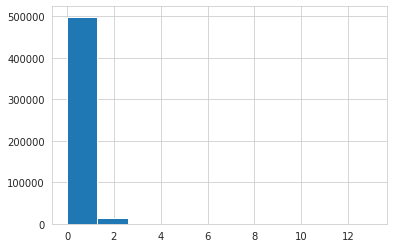

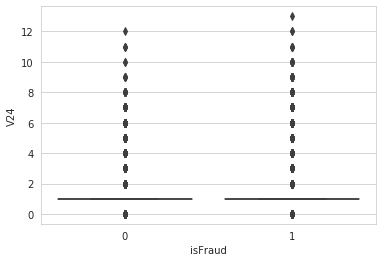

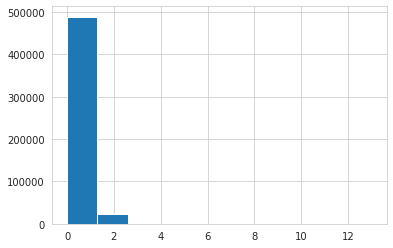

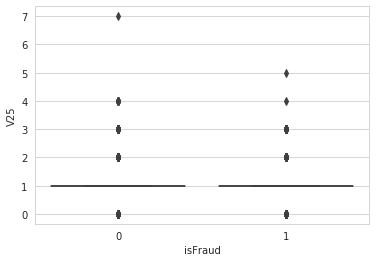

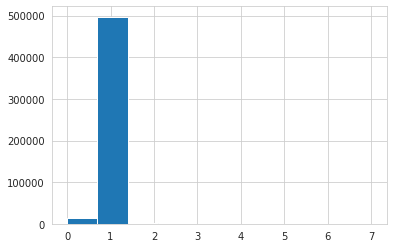

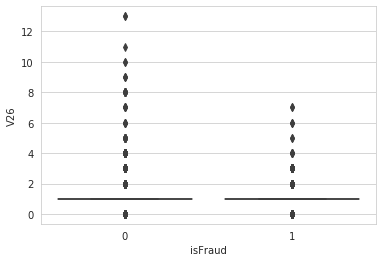

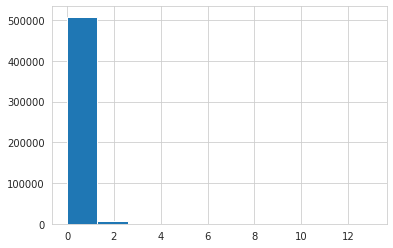

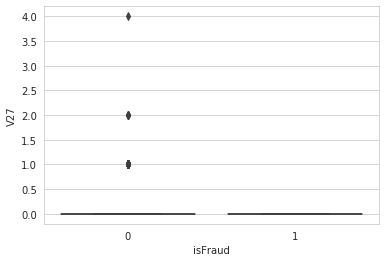

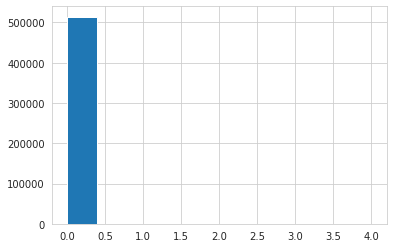

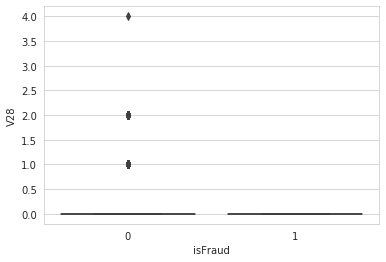

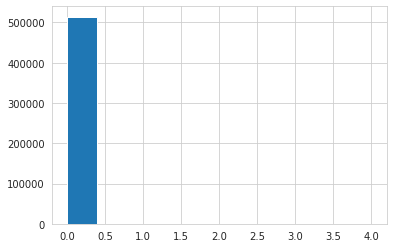

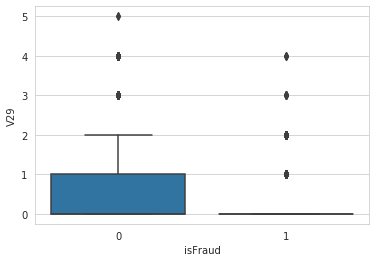

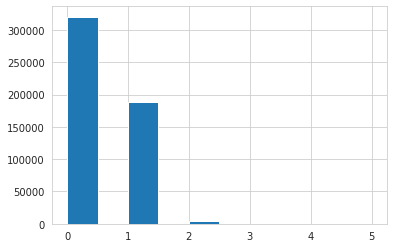

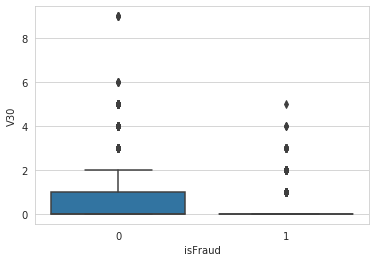

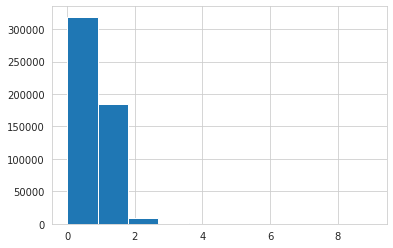

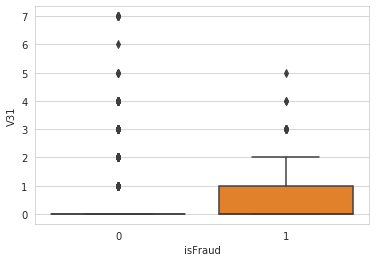

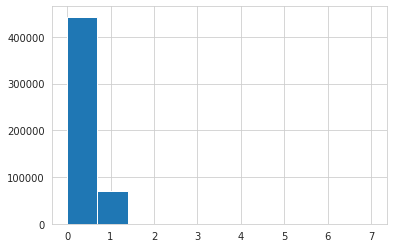

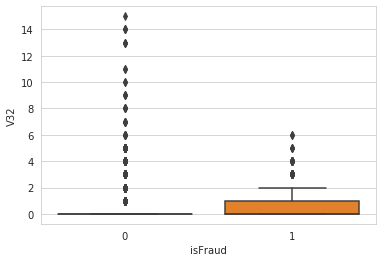

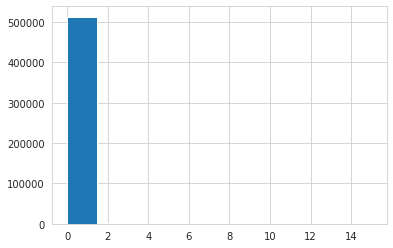

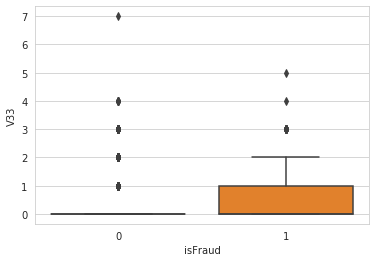

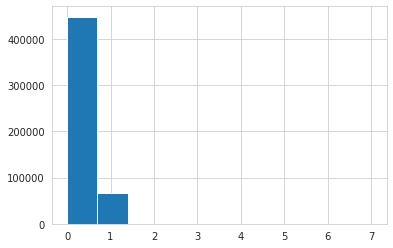

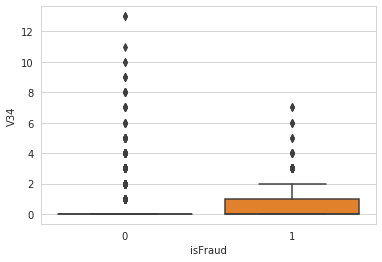

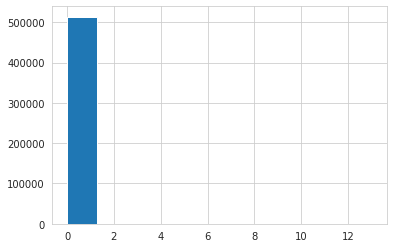

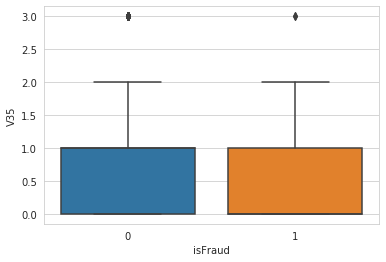

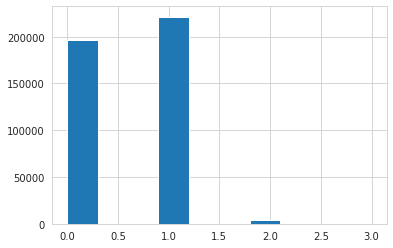

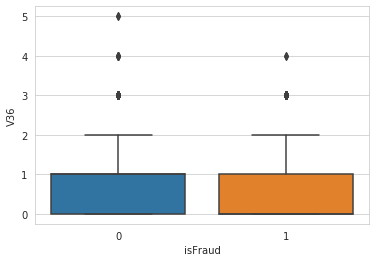

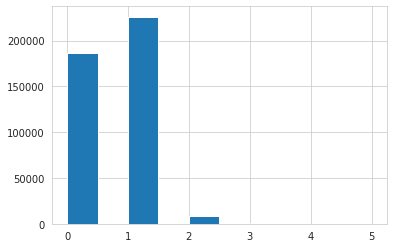

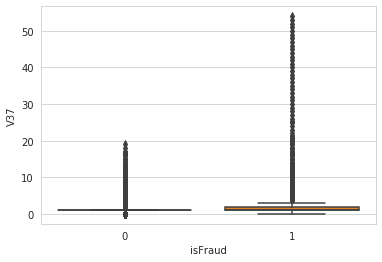

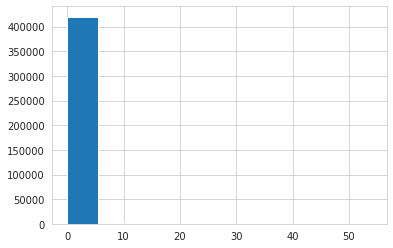

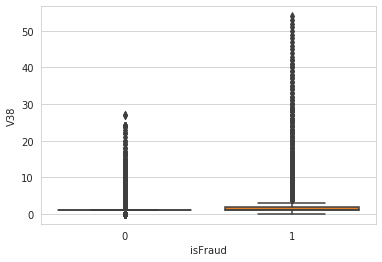

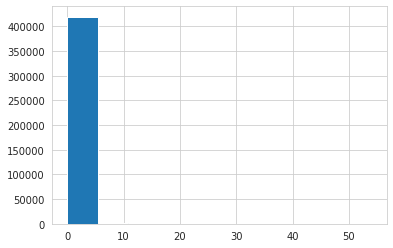

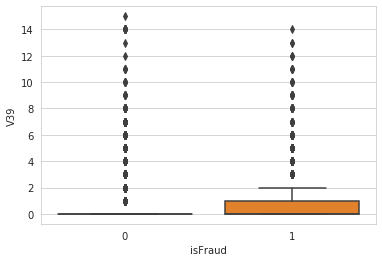

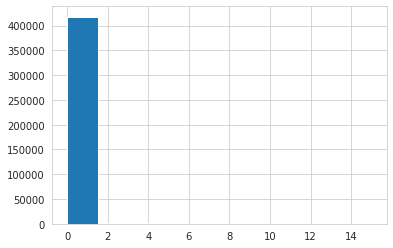

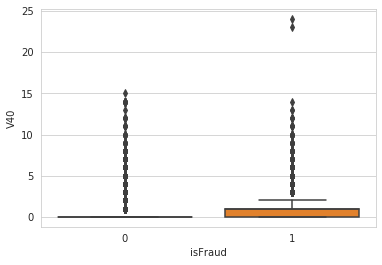

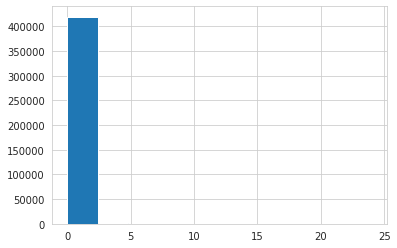

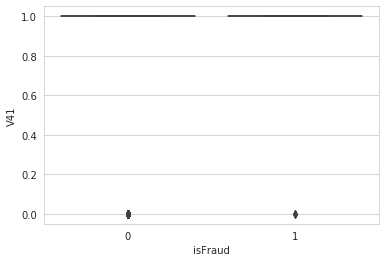

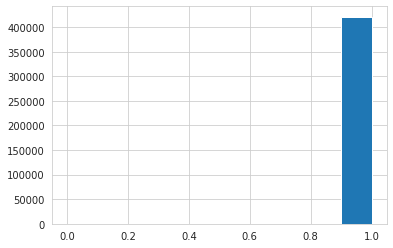

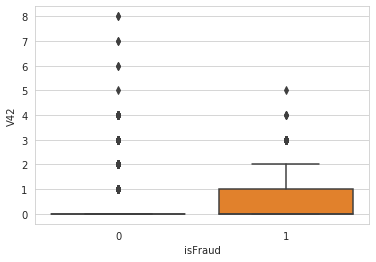

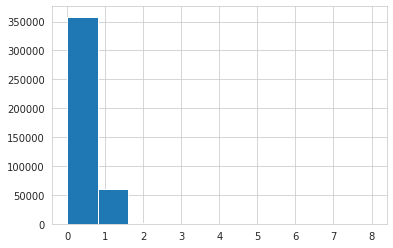

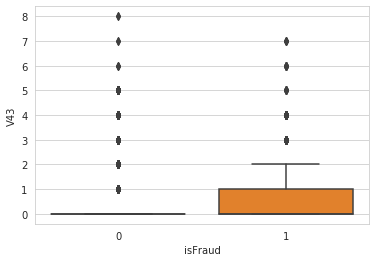

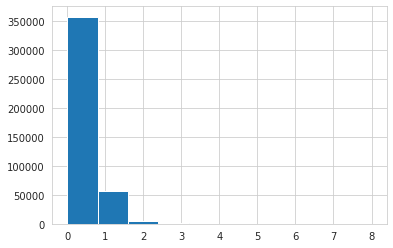

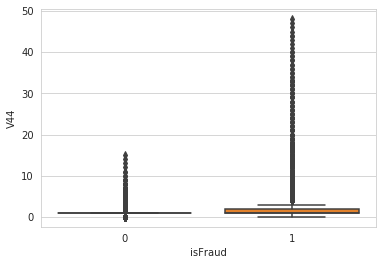

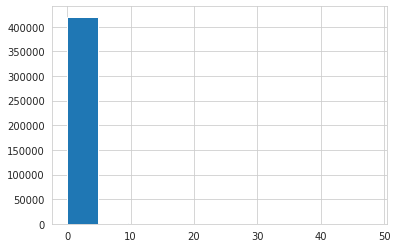

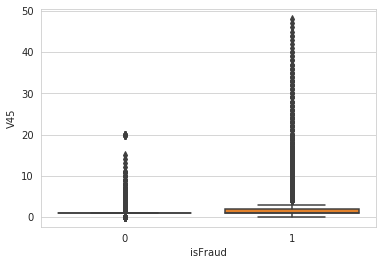

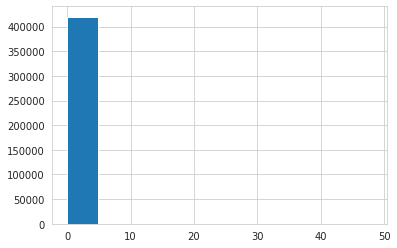

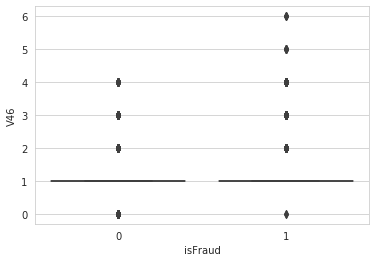

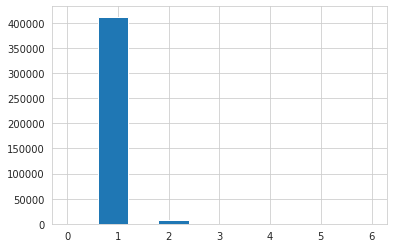

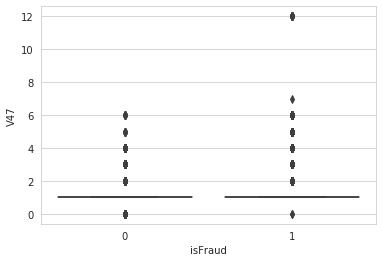

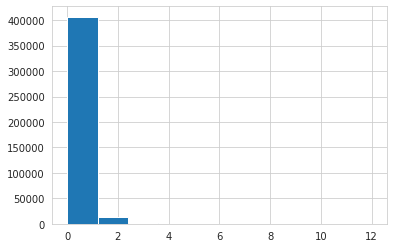

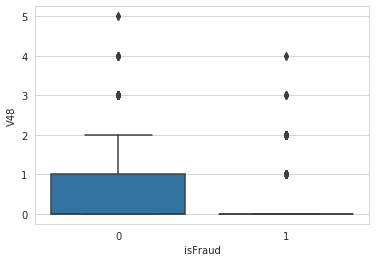

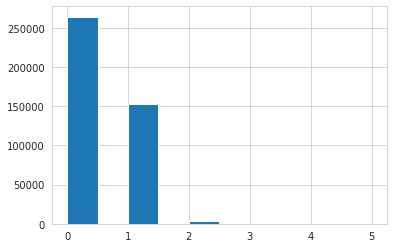

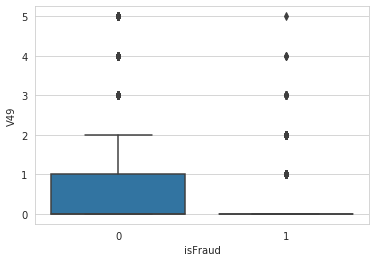

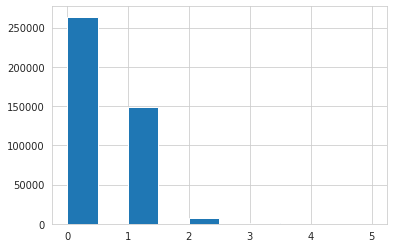

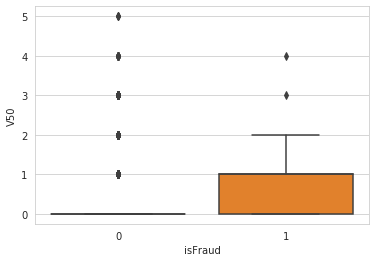

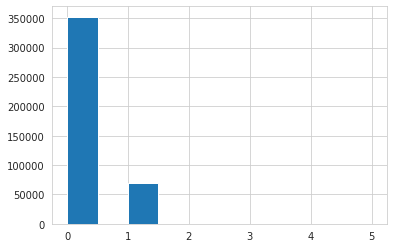

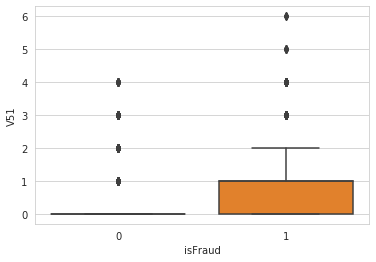

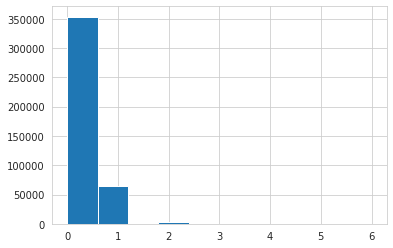

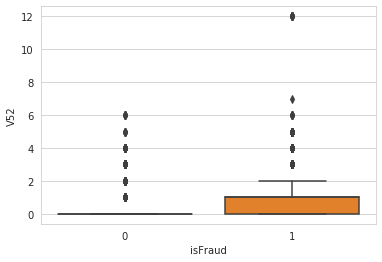

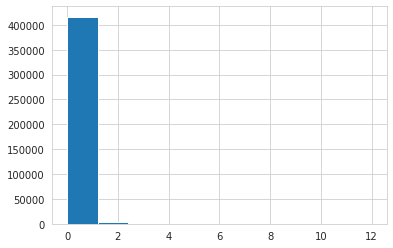

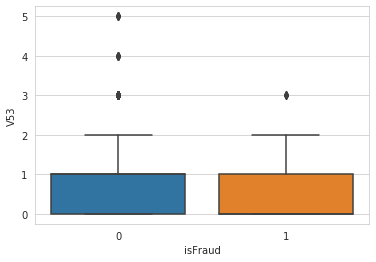

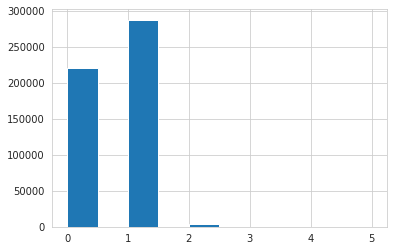

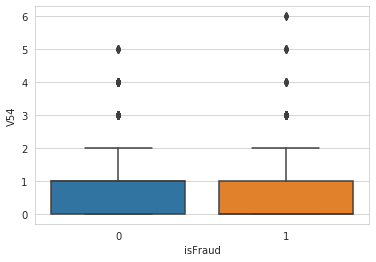

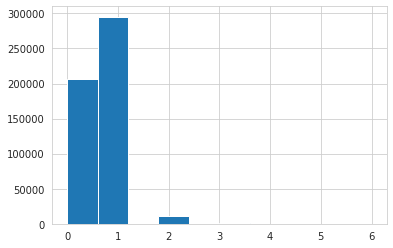

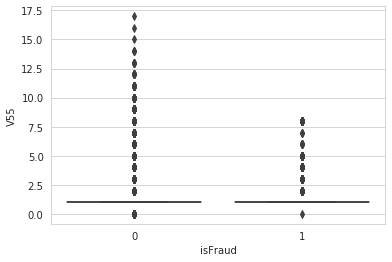

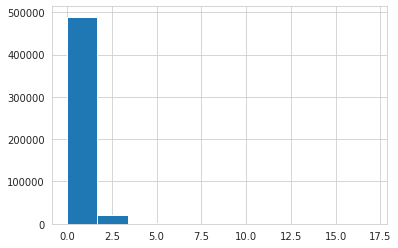

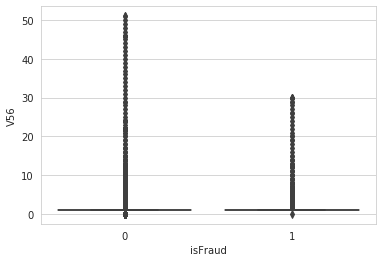

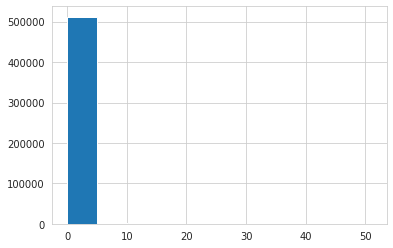

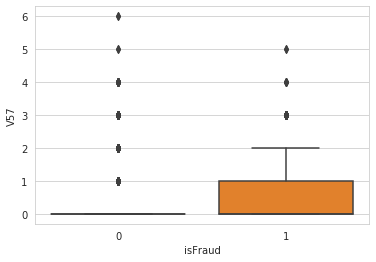

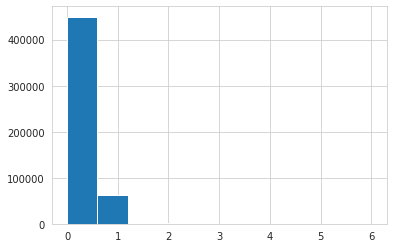

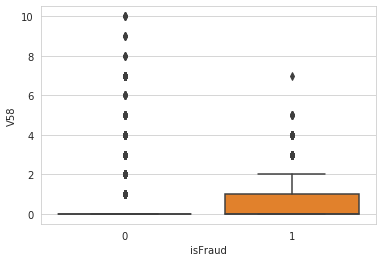

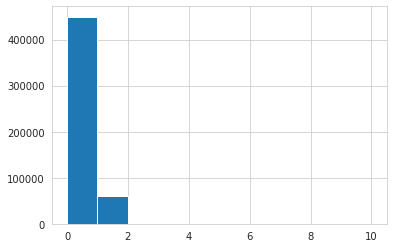

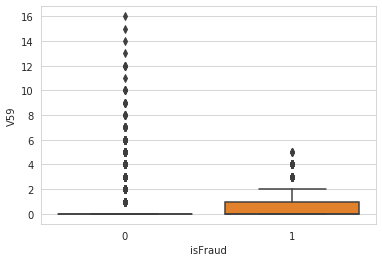

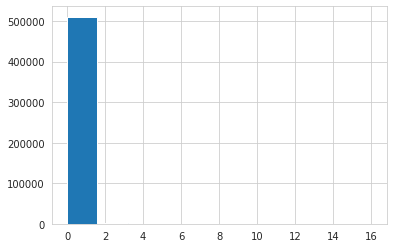

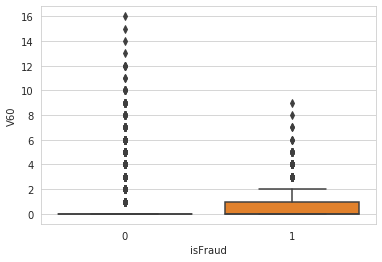

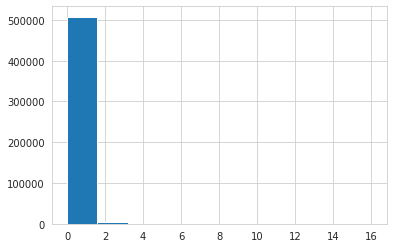

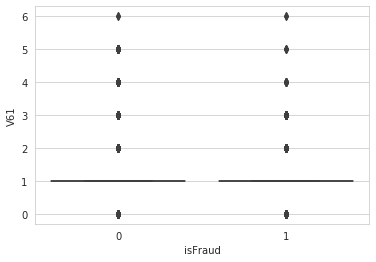

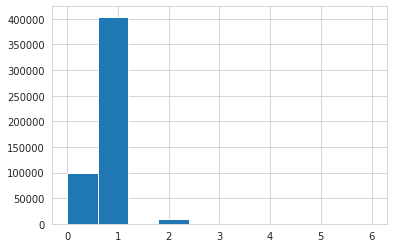

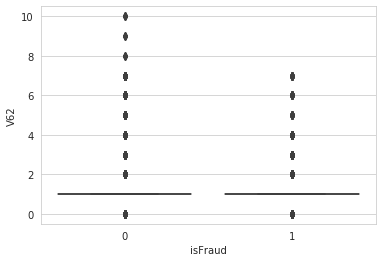

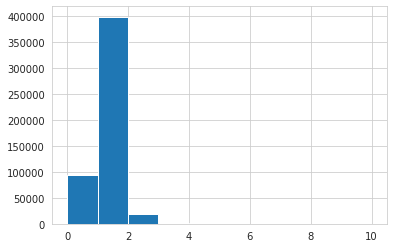

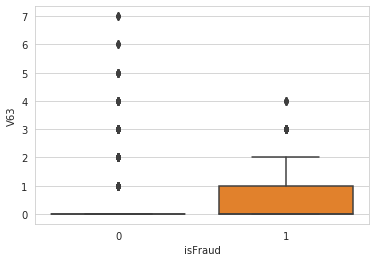

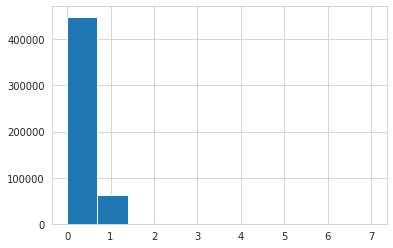

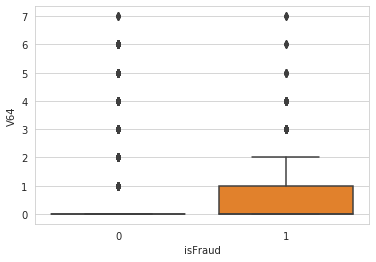

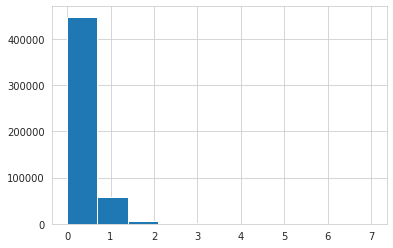

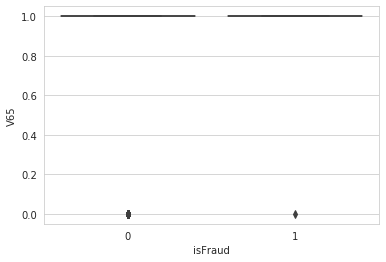

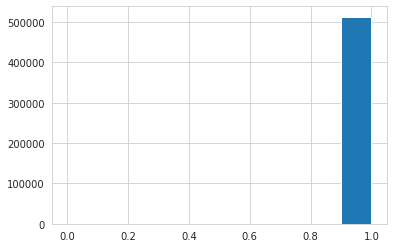

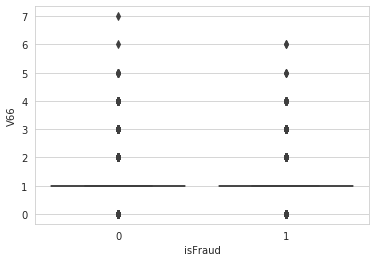

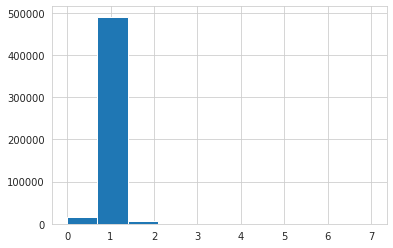

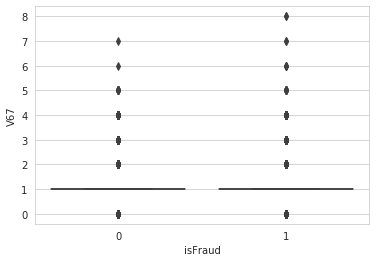

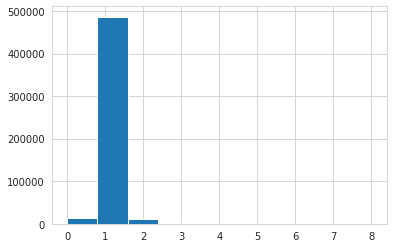

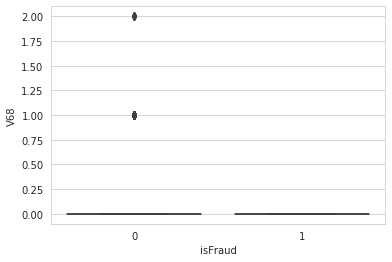

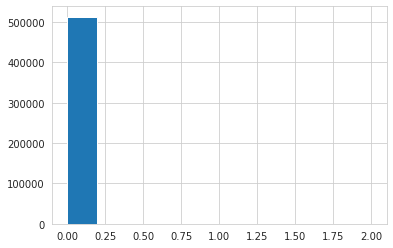

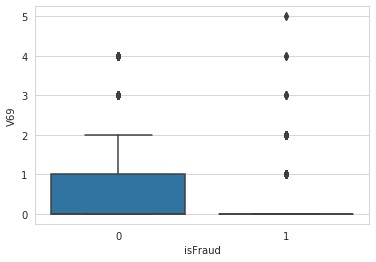

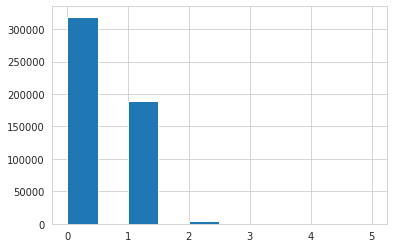

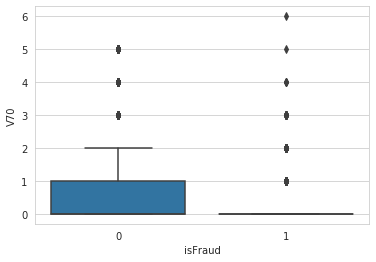

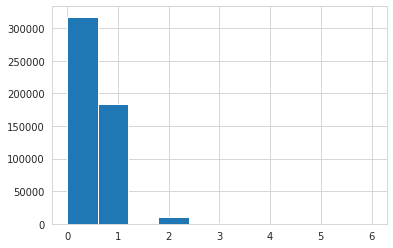

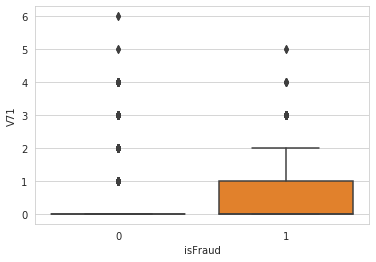

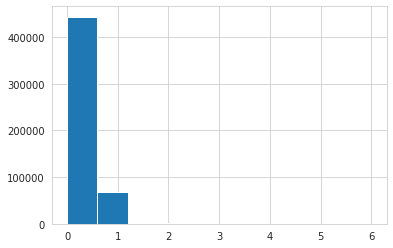

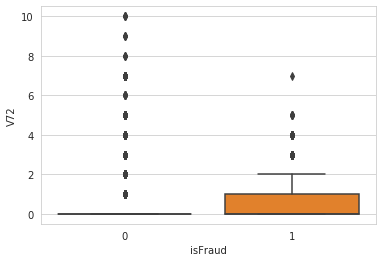

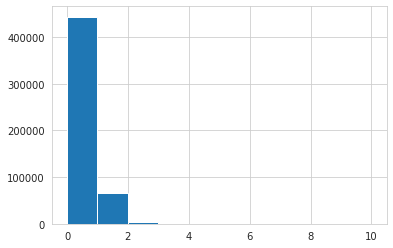

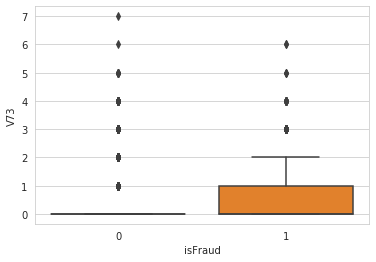

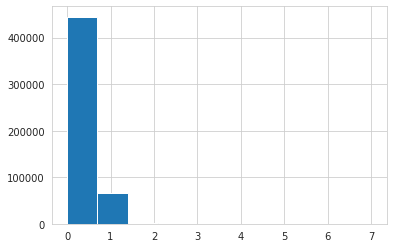

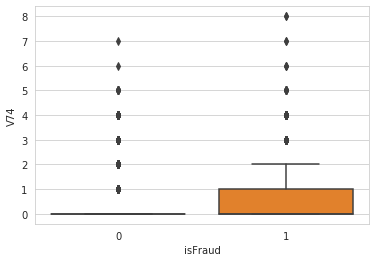

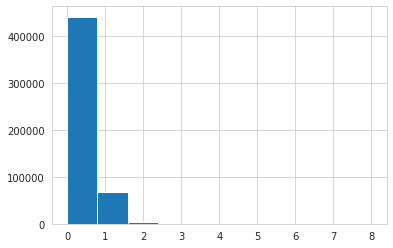

In [99]:
for i in range(100):
  plt.figure(i)
  sns.boxplot(x=df.isFraud,y=df_nm[df_nm_working.columns[i+6]])
  plt.figure(i+200) 
  df_nm[df_nm_working.columns[i+6]].hist()


Text(0.5, 1.0, 'The histograms of first 5 columns')

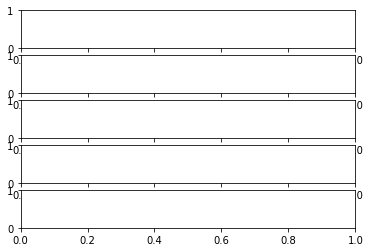

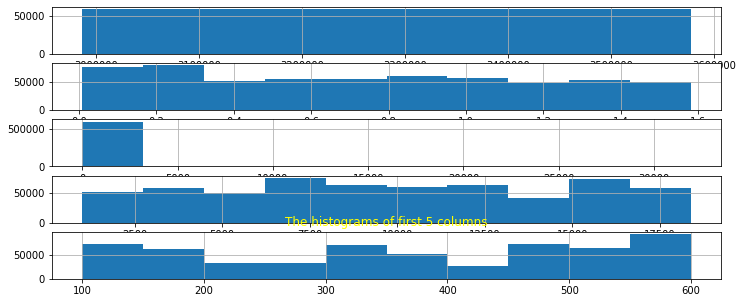

In [0]:
fig,ax = plt.subplots(5,1)
fig = plt.figure(figsize=(12,5))

#fig = plt.figure()
for i in range(5):
  plt.subplot(5,1,i+1)
  df_nm_working[df_nm_working.columns[i]].hist()
plt.title('The histograms of first 5 columns',fontsize = 12,color='yellow')

In [0]:
#more than 70% missing value drop the column
# missing value of a row having null value
df[(df.V300.isnull()) & (df.V299.isnull())].head()

In [0]:
#imputing rows where values are null, go with column removals
#fill the missing values with random numbers with 2 std deviation or build a model/regression to 
#predict missing data
## FInd the columns where missing value is more than 70%
#type(df_missing_per)
#df_missing_df = pd.DataFrame(df_missing_per)
#df_missing_df[df_missing_df > 70]

In [0]:
min_amt = df_nm_working['TransactionAmt'].min()
max_amt = df_nm_working['TransactionAmt'].max()
print(min_amt,max_amt)
amt = df_nm_working['TransactionAmt'].values
print(min(amt),max(amt))

0.251 31937.391
0.251 31937.391


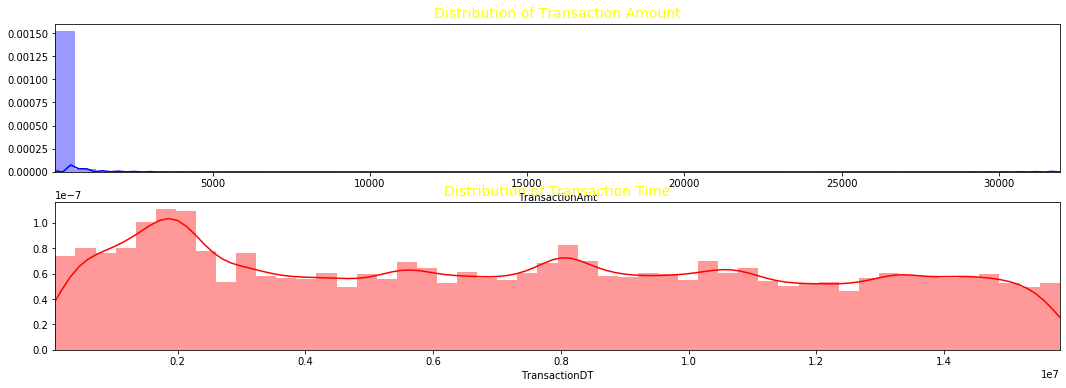

In [0]:
# We will see the distribution of the data on TransactionAmt and TransactionDT

fig,ax = plt.subplots(2,1,figsize=(18,6))
#plt.figure(figsize=(12,5))
plt.title('Distribution of Amount and Time')
#plt.subplot(2,1,1)
sns.distplot(df_nm_working.TransactionAmt,ax=ax[0],color='b')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14,color = 'yellow')
ax[0].set_xlim([min_amt, max_amt])

sns.distplot(df_nm_working.TransactionDT, ax=ax[1], color='r')
ax[1].set_title('Distribution of Transaction Time', fontsize=14,color = 'yellow')
ax[1].set_xlim([min(df_nm_working.TransactionDT), max(df_nm_working.TransactionDT)])

plt.show()


Normality Check

In [0]:
#Outlier removal, Log transformation, log plot data, positive skewness and negative skewness, treatment is different
df_nm_working.head()


,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,86400,68.5,13926,NaN,150.0,142.0,315.0,87.0,19.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,13.0,13.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,287.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,315.0,315.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,84.0,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,

In [0]:
df_nm_working.describe().T

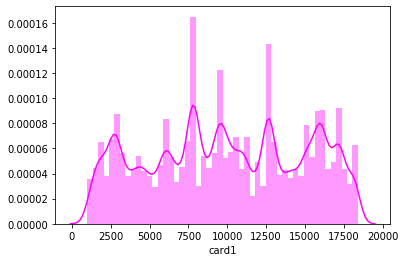

In [0]:
df_nm_working.card1.isnull().sum()
sns.distplot(df_nm_working.card1,color = 'magenta')

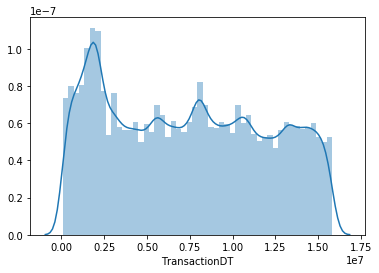

In [0]:
sns.distplot(df_nm_working.TransactionDT)

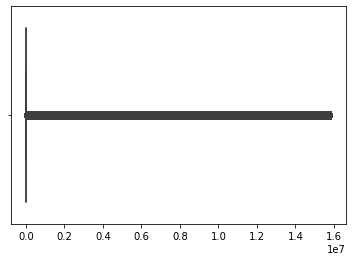

In [0]:
sns.boxenplot(df_nm_working)

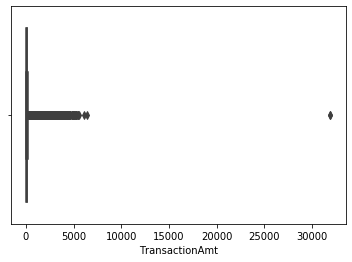

In [0]:
sns.boxplot(df_nm_working['TransactionAmt'])

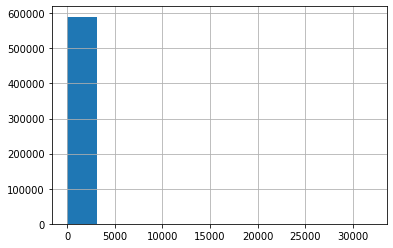

In [0]:
#Histogram Plot
df_nm_working['TransactionAmt'].hist()

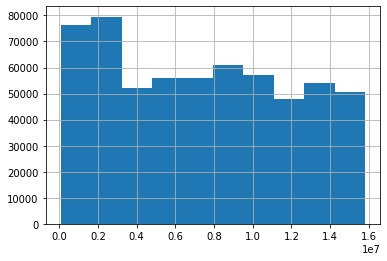

In [0]:
df_nm_working['TransactionDT'].hist()

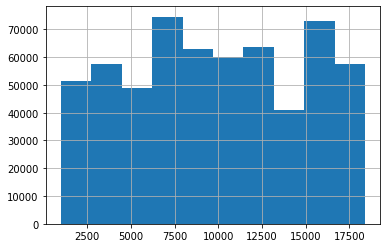

In [0]:
df_nm_working['card1'].hist()

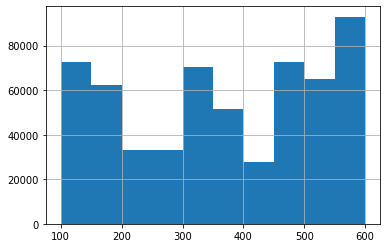

In [0]:
df_nm_working['card2'].hist()

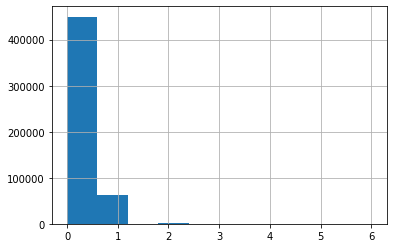

In [0]:
df_nm_working['V57'].hist()

In [0]:
df_nm_working['V57'].describe()

count    513444.000000
mean          0.128312
std           0.349094
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: V57, dtype: float64

In [0]:
#Amount field related to Fraud
df_0 = df.TransactionAmt[df.isFraud == 0]
df_0.shape

(569877,)

In [0]:
df.shape[0] - df_0.shape[0]

20663

In [0]:
df_1 = df.TransactionAmt[df.isFraud == 1]
df_1.shape

(20663,)

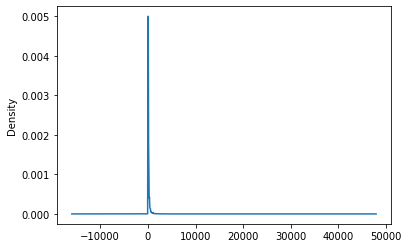

In [0]:
df_0.plot.kde()

In [0]:
df_nm = df[numerical_featuress]
cols = df_nm.columns[df_nm.isnull().mean() > 0.2]
df_nm_working2 = df_nm.drop(cols,axis=1)

In [0]:
df_nm_working2.shape

(590540, 177)

Text(0, 0.5, 'Frequency')

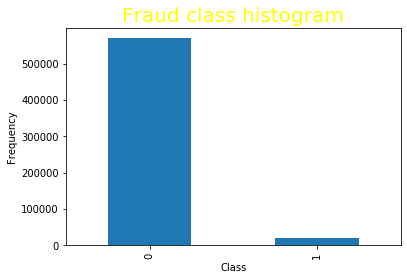

In [0]:
count_classes = pd.value_counts(df['isFraud'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram",color = 'yellow',fontsize=20)
plt.xlabel("Class")
plt.ylabel("Frequency")


# NORMALITY CHECK 

---




In [0]:
#Normality check, Outlier removal, log transformation log  and plot the data , root power of data (1/3)
# negatively skewed, take power of the data square and cube
from sklearn.preprocessing import StandardScaler,RobustScaler
std_scalar = StandardScaler()
rob_scalar = RobustScaler()
df_nm_working['scaledAmt'] = rob_scalar.fit_transform(df_nm_working['TransactionAmt'].values.reshape(-1,1))
df_nm_working['scaledTime'] = rob_scalar.fit_transform(df_nm_working['TransactionAmt'].values.reshape(-1,1))

In [0]:
df_nm_working.drop(['TransactionAmt','TransactionDT'],axis=1,inplace=True)

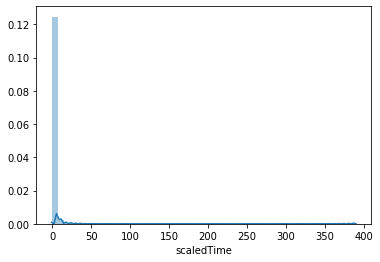

In [0]:
sns.distplot(df_nm_working['scaledTime'])

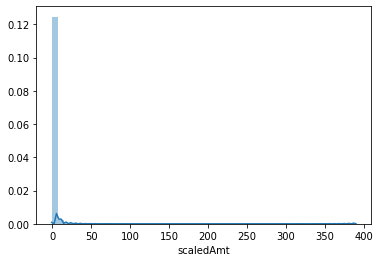

In [0]:
sns.distplot(df_nm_working['scaledAmt'])

In [0]:
# ALt + Enter create a new cell below it

$\sqrt{3x-1}/(1+x)^2$


# Approach
Random undersampling technique:
We need to create another sample dataframe for creating a model. This will be tested agains the whole dataframe. Whether it is undersampling or oversampling method, we have to test it against the whole dataframe

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold

print('Fraud data present in this dataset',round(percentage_fraud,2))
print('Fair data present in this dataset',round(100-percentage_fraud,2))
X = df_nm_working
y = df['isFraud']

#skf = StratifiedKFold(n_splits = 5)
skf = StratifiedKFold(n_splits = 5)
for train_index, test_index in skf.split(X,y):
  print('Train: ',train_index ,'Test: ',test_index)
  orig_X_train, orig_X_test = X.iloc[train_index], X.iloc[test_index]
  orig_y_train, orig_y_test = y.iloc[train_index], y.iloc[test_index]
  
# Turn these into arrays
orig_X_train = orig_X_train.values
orig_X_test = orig_X_test.values
orig_y_train = orig_y_train.values
orig_y_test = orig_y_test.values

# find the unique labels in the X train and test, y train and test
train_unique_label, train_unique_count = np.unique(orig_y_train,return_counts=True)
test_unique_label, test_unique_count = np.unique(orig_y_test,return_counts=True)

# determine the percentage of uniqueness
print('*====*' * 20)
print('train:',train_unique_count/len(orig_y_train))
print('test:',test_unique_count/len(orig_y_test))
  

Fraud data present in this dataset 3.5
Fair data present in this dataset 96.5
Train:  [116771 116772 116773 ... 590537 590538 590539] Test:  [     0      1      2 ... 154537 154538 154540]
Train:  [     0      1      2 ... 590537 590538 590539] Test:  [116771 116772 116773 ... 253312 253376 253392]
Train:  [     0      1      2 ... 590537 590538 590539] Test:  [235448 235449 235450 ... 366821 366862 366877]
Train:  [     0      1      2 ... 590537 590538 590539] Test:  [353901 353902 353903 ... 472501 472502 472503]
Train:  [     0      1      2 ... 472501 472502 472503] Test:  [470280 470286 470298 ... 590537 590538 590539]
*====**====**====**====**====**====**====**====**====**====**====**====**====**====**====**====**====**====**====**====*
train: [0.96500879 0.03499121]
test: [0.96501477 0.03498523]


In [0]:
?StratifiedShuffleSplit

# Random Undersampling

In [0]:
'''
Our class is highly imbalanced. with 3.5% data is Fraud class and the rest is 96.5%. 
1. we must make the shape of the data as normal. Before anything, we must shuffle the dataframe
'''
fraud_cases = df[df.isFraud == 1]
print('the number of data having fraud case',len(fraud_cases))

df = df.sample(frac=1)
df_1 = df.loc[fraud_cases.index]

print(df_1.shape)

the number of data having fraud case 20663
(20663, 394)


In [0]:
df_0 = df.loc[df.isFraud == 0][:len(fraud_cases)]
print(df_0.shape)

(20663, 394)


In [0]:
#another implementation: for getting 50:50 
fraud_cases = df.isFraud == 1
df_1 = df.loc[fraud_cases]
df_0 = df.loc[~fraud_cases][:len(df_1)]
print(df_1.shape,df_0.shape)

(20663, 394) (20663, 394)


In [0]:
df_new = pd.concat([df_1,df_0])
df_new = df_new.sample(frac=1,random_state = 42)
df_new.shape

(41326, 394)

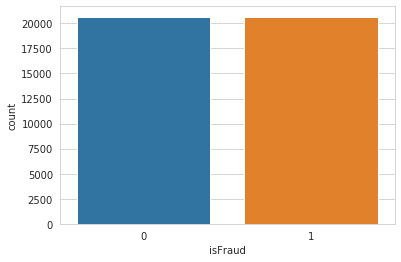

In [0]:
sns.set_style("whitegrid")
sns.countplot(df_new['isFraud'])

# Correlation check
  Here we will check the correlation among the features of the original dataset and the new dataset

Text(0.5, 1, "Original data frame correlation \n (Don't use this for reference)")

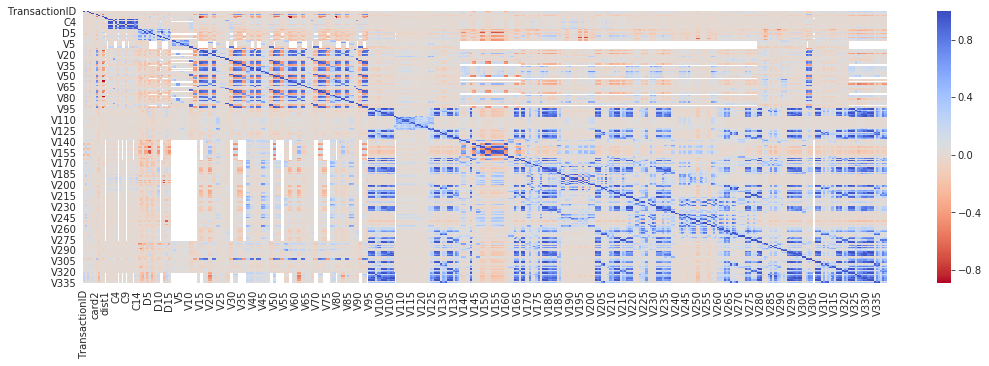

In [0]:
# fig,ax = plt.subplots(1,1,figsize=(12,5))
plt.figure(figsize=(18,5))
corr = df.corr()
sns.set_style("whitegrid")
sns.heatmap(corr,cmap='coolwarm_r',annot_kws={'font':14})
ax[0].set_title("Original data frame correlation \n (Don't use this for reference)")

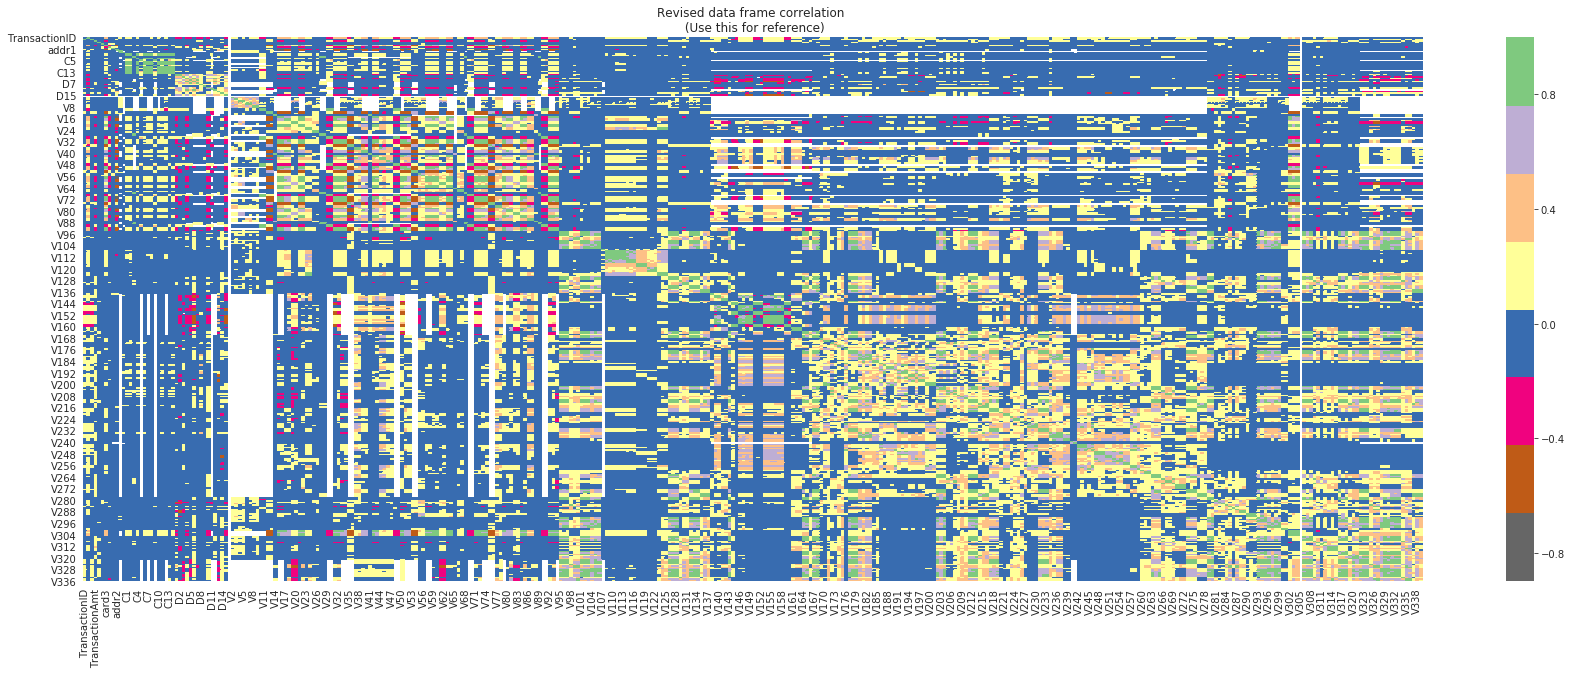

In [0]:
plt.figure(figsize=(30,10))
corr_new = df_new.corr()
sns.set_style("whitegrid")
sns.heatmap(corr_new,cmap='Accent_r',annot_kws={'font':14})
plt.title("Revised data frame correlation \n (Use this for reference)")
plt.show()

# Box plot on some correlations

In [0]:
#box plot on feature V95
sns.boxplot(x=df_new.V95,y=df_new.isFraud,data=df_new)

Text(0.5, 1.0, 'TransactionAmt vs Class Positive Correlation')

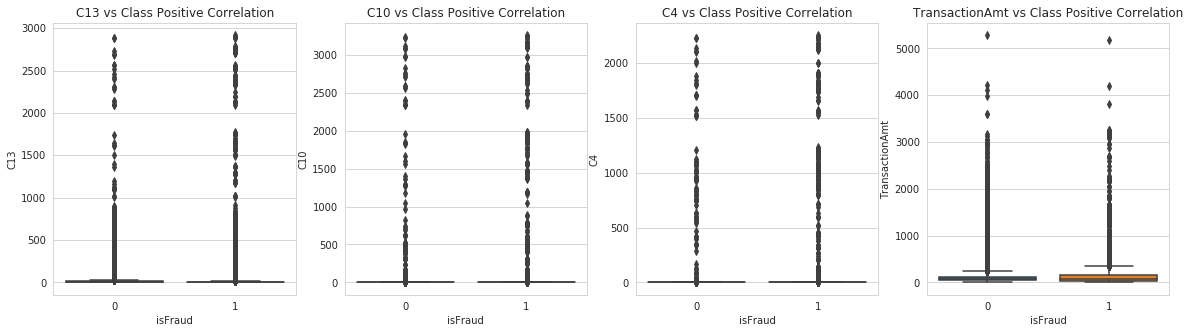

In [0]:
#Positive Corelation
fig,ax = plt.subplots(ncols=4,figsize=(20,5))
sns.boxplot(y='C13',x='isFraud',data=df_new, ax=ax[0])
ax[0].set_title('C13 vs Class Positive Correlation')

sns.boxplot(y='C10',x='isFraud',data=df_new, ax=ax[1])
ax[1].set_title('C10 vs Class Positive Correlation')

sns.boxplot(y='C4',x='isFraud',data=df_new, ax=ax[2])
ax[2].set_title('C4 vs Class Positive Correlation')

sns.boxplot(x='isFraud',y='TransactionAmt',data=df_new, ax=ax[3])
ax[3].set_title('TransactionAmt vs Class Positive Correlation')

Text(0.5, 1.0, 'V320 vs Class Negative Correlation')

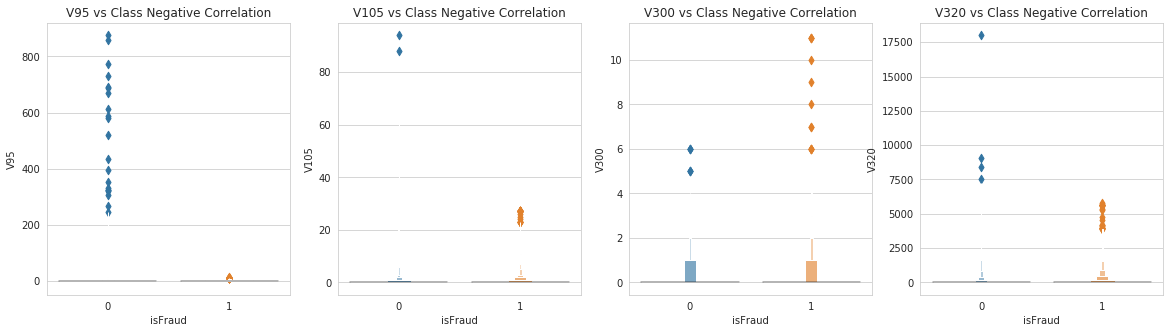

In [0]:
#Negative correlations
fig,ax = plt.subplots(ncols=4,figsize=(20,5))
sns.boxenplot(y='V95',x='isFraud',data=df_new, ax=ax[0])
ax[0].set_title('V95 vs Class Negative Correlation')

sns.boxenplot(y='V105',x='isFraud',data=df_new, ax=ax[1])
ax[1].set_title('V105 vs Class Negative Correlation')

sns.boxenplot(y='V300',x='isFraud',data=df_new, ax=ax[2])
ax[2].set_title('V300 vs Class Negative Correlation')

sns.boxenplot(x='isFraud',y='V320',data=df_new, ax=ax[3])
ax[3].set_title('V320 vs Class Negative Correlation')

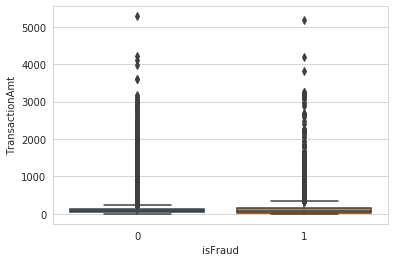

In [0]:
sns.boxplot(x='isFraud',y='TransactionAmt',data=df_new)

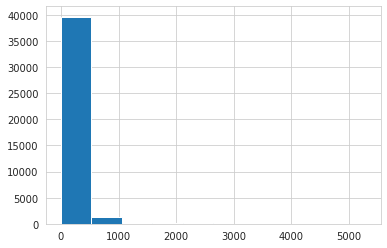

In [0]:
df_new['TransactionAmt'].hist()

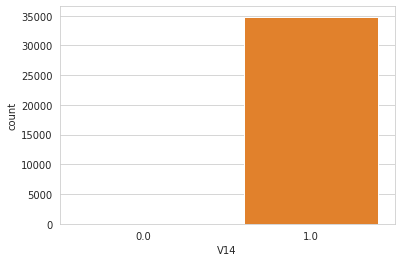

In [0]:
from scipy.stats import norm
#v14 fraud distribution
df_new['V14'].loc[df_new.isFraud == 1].value_counts()
sns.countplot(df_new.V14)

In [0]:
df_new.V14.isnull().sum()


6485

In [0]:
df_new.V14.replace(np.nan,df_new.V14.median(),inplace = True)

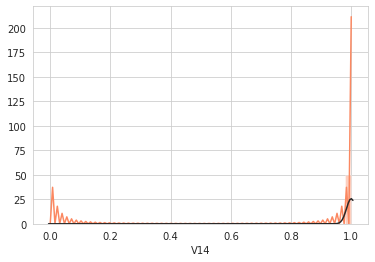

In [0]:
sns.distplot(df_new.V14,fit=norm, color='#FB8861')

In [0]:
from scipy.stats import skew
# degree how much it is not skewed
skew(df[numerical_featuress])

In [0]:
skew(df['C1'])

23.95789879990789

In [0]:
#find the threshold beyond which skewness handling is mandatory
#find skewness of all data
#handle skeneww if required
#find the top 10 columns